In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv('Maternal_Health_Risk_Data_Set.csv')

In [13]:
# print first 5 rows of the dataset
data.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [14]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [15]:
# number of rows and columns in the dataset
data.shape

(1014, 7)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [17]:
# checking for missing values
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [18]:
# statistical measures about the data
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [19]:
# checking the distribution of Target Variable
data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [45]:
data['RiskLevel'].replace(['low risk', 'mid risk','high risk'], [0, 1,2], inplace=True)
#low risk ->0
#mid risk ->1
#high risk ->2

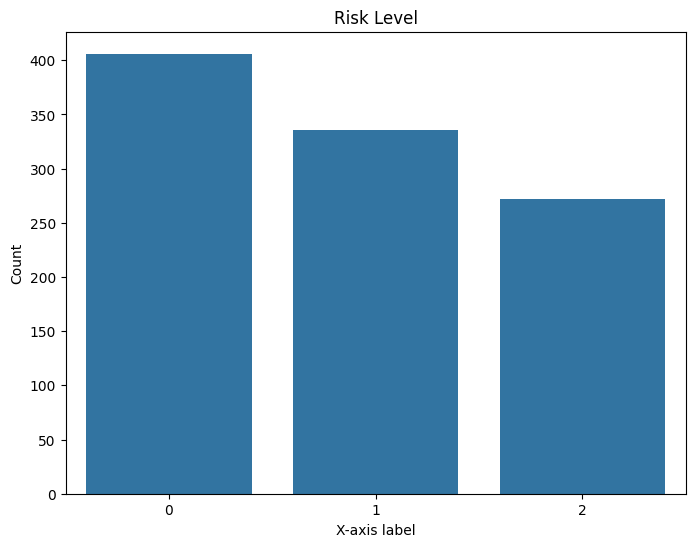

In [21]:
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
sns.countplot(x="RiskLevel", data=data)
plt.xlabel('X-axis label')
plt.ylabel('Count')
plt.title('Risk Level')
plt.show()


In [22]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [23]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2
1013,32,120,65,6.0,101.0,76,1


In [24]:
data['RiskLevel'].value_counts()

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64

In [46]:
X = data.drop(columns=['RiskLevel'], axis=1)
Y = data['RiskLevel']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_dt = DecisionTreeClassifier()

In [50]:
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
X_test_prediction = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy on Training data : ', test_data_accuracy)

Accuracy on Training data :  0.7980295566502463


In [51]:
import warnings
warnings.filterwarnings('ignore')
input_data = (25 ,110,89,7.01,98 ,77 )


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_dt.predict(input_data_reshaped)
print(prediction)


if prediction == 0:
    print('The patient has "low risk"')
elif prediction == 1:
    print('The patient has "medium level risk"')
else:
    print('The patient has "high level risk"')


[0]
The patient has "low risk"
